**Task no.1 solution** 

Konstantin Gavaza, J41332c

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

In [2]:
def plot_precision_recall_curve(model, X_test, Y_test, name_model = 'DecisionTreeClassifier'):
    from sklearn.metrics import precision_recall_curve
    
    '''
    model - trained model based on training data
    X_test - test data (X)
    Y_test - test classes (Y)
    name_model - model name
    '''
    
    precision, recall, thresholds = precision_recall_curve(Y_test, model.predict_proba(X_test)[:, 1])
    
    plt.plot(thresholds, precision[:-1], label = 'Precision')
    plt.plot(thresholds, recall[:-1], label = 'Recall')
    plt.xlabel("Thresholds")
    plt.ylabel("Metric values")
    plt.title("Precision-recall curve for {name}".format(name = name_model))
    plt.legend()

In [3]:
def plot_ROC(model, X_test, Y_test, name_model = 'DecisionTreeClassifier'):
    from sklearn.metrics import roc_curve
    
    '''
    model - trained model based on training data
    X_test - test data (X)
    Y_test - test classes (Y)
    name_model - model name
    '''
    
    fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
    
    plt.plot(fpr, tpr)
    plt.xlabel("FP rate")
    plt.ylabel("TP rate")
    plt.title("ROC curve for {name}".format(name = name_model))

In [4]:
def metrics(model, X_test, Y_test, name_model = 'DecisionTreeClassifier'):
    from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
    
    '''
    model - trained model based on training data
    X_test - test data (X)
    Y_test - test classes (Y)
    name_model - model name
    '''
    
    dict_metrics = {'precision score' : [precision_score(Y_test, model.predict(X_test))],
                   'recall score': [recall_score(Y_test, model.predict(X_test))],
                   'accuracy score': [accuracy_score(Y_test, model.predict(X_test))],
                   'f1 score': [f1_score(Y_test, model.predict(X_test))],
                   'log loss': [log_loss(Y_test, model.predict(X_test))]}
    
    return pd.DataFrame.from_dict(data = dict_metrics).style.hide_index()

In [5]:
def confusion_matrix(model, X_test, Y_test, name_model = 'DecisionTreeClassifier'):
    from sklearn.metrics import confusion_matrix
    
    '''
    model - trained model based on training data
    X_test - test data (X)
    Y_test - test classes (Y)
    name_model - model name
    '''
    
    return confusion_matrix(Y_test, model.predict(X_test), normalize = 'true')

In [6]:
data = pd.read_csv('bioresponse.csv')

In [7]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = data.drop(['Activity'], axis = 1)
Y = data['Activity']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

**Small decision tree**

In [10]:
tree_sm = DecisionTreeClassifier(max_depth=5, random_state=1234)
tree_sm.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

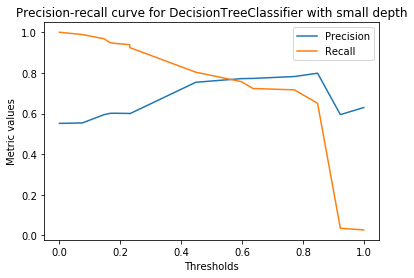

In [11]:
plot_precision_recall_curve(tree_sm, X_test, Y_test, 'DecisionTreeClassifier with small depth')

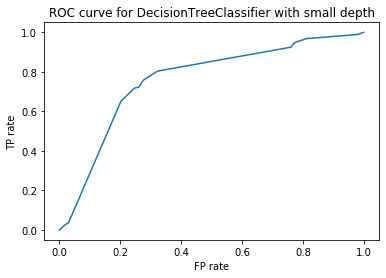

In [12]:
plot_ROC(tree_sm, X_test, Y_test, 'DecisionTreeClassifier with small depth')

In [13]:
metrics(tree_sm, X_test, Y_test, 'DecisionTreeClassifier with small depth')

precision score,recall score,accuracy score,f1 score,log loss
0.771757,0.756844,0.742451,0.764228,8.89552


In [14]:
confusion_matrix(tree_sm, X_test, Y_test, 'DecisionTreeClassifier with small depth')

array([[0.72475248, 0.27524752],
       [0.2431562 , 0.7568438 ]])

**Deep decision tree**

In [15]:
tree_deep = DecisionTreeClassifier(max_depth=15, random_state=1234)
tree_deep.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

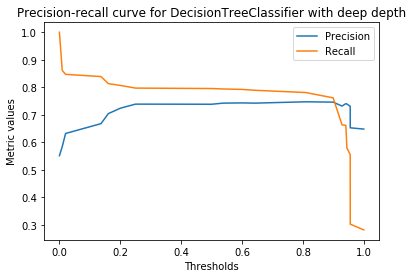

In [16]:
plot_precision_recall_curve(tree_deep, X_test, Y_test, 'DecisionTreeClassifier with deep depth')

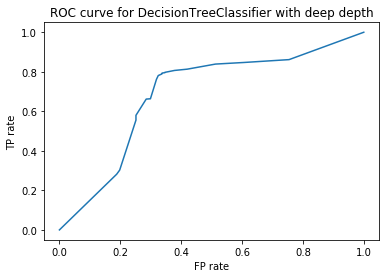

In [17]:
plot_ROC(tree_deep, X_test, Y_test, 'DecisionTreeClassifier with deep depth')

In [18]:
metrics(tree_deep, X_test, Y_test, 'DecisionTreeClassifier with deep depth')

precision score,recall score,accuracy score,f1 score,log loss
0.74247,0.793881,0.734458,0.767315,9.17161


In [19]:
confusion_matrix(tree_deep, X_test, Y_test, 'DecisionTreeClassifier with deep depth')

array([[0.66138614, 0.33861386],
       [0.20611916, 0.79388084]])

**Random forest on small trees**

In [20]:
RF_sm = RandomForestClassifier(max_depth=5, random_state=1234)
RF_sm.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

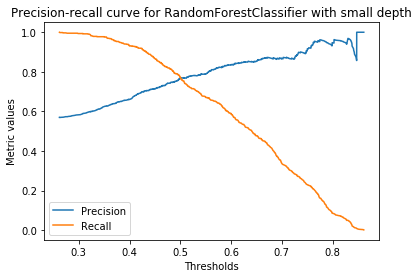

In [21]:
plot_precision_recall_curve(RF_sm, X_test, Y_test, 'RandomForestClassifier with small depth')

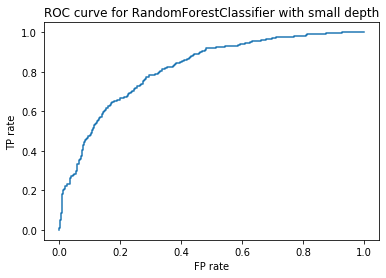

In [22]:
plot_ROC(RF_sm, X_test, Y_test, 'RandomForestClassifier with small depth')

In [23]:
metrics(RF_sm, X_test, Y_test, 'RandomForestClassifier with small depth')

precision score,recall score,accuracy score,f1 score,log loss
0.76886,0.771337,0.746004,0.770096,8.77283


In [24]:
confusion_matrix(RF_sm, X_test, Y_test, 'RandomForestClassifier with small depth')

array([[0.71485149, 0.28514851],
       [0.22866345, 0.77133655]])

**Random forest on deep trees**

In [25]:
RF_deep = RandomForestClassifier(max_depth=15, random_state=1234)
RF_deep.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

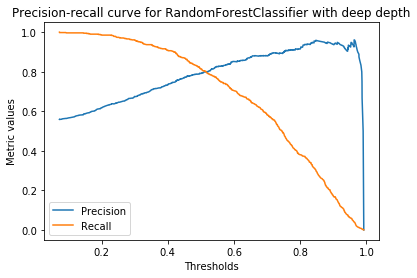

In [26]:
plot_precision_recall_curve(RF_deep, X_test, Y_test, 'RandomForestClassifier with deep depth')

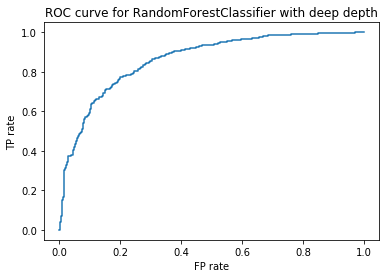

In [27]:
plot_ROC(RF_deep, X_test, Y_test, 'RandomForestClassifier with deep depth')

In [28]:
metrics(RF_deep, X_test, Y_test, 'RandomForestClassifier with deep depth')

precision score,recall score,accuracy score,f1 score,log loss
0.791536,0.813205,0.778863,0.802224,7.63789


In [29]:
confusion_matrix(RF_deep, X_test, Y_test, 'RandomForestClassifier with deep depth')

array([[0.73663366, 0.26336634],
       [0.18679549, 0.81320451]])

**Train a classifier who avoids Type II (False Negative) errors and calculate metrics**

In [57]:
RFw_deep = RandomForestClassifier(max_depth=15, class_weight={0: 1, 1: 5}, random_state=1234)
RFw_deep.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 5},
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

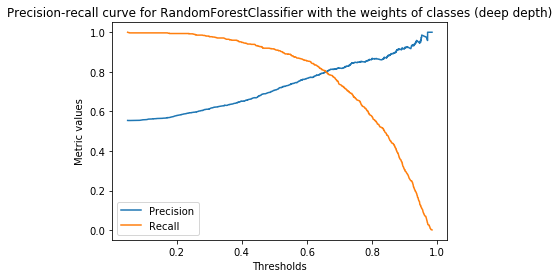

In [58]:
plot_precision_recall_curve(RFw_deep, X_test, Y_test, 'RandomForestClassifier with the weights of classes (deep depth)')

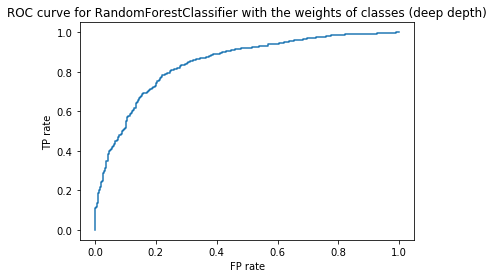

In [59]:
plot_ROC(RFw_deep, X_test, Y_test, 'RandomForestClassifier with the weights of classes (deep depth)')

In [60]:
metrics(RFw_deep, X_test, Y_test, 'RandomForestClassifier with the weights of classes (deep depth)')

precision score,recall score,accuracy score,f1 score,log loss
0.707347,0.914654,0.744227,0.797753,8.83424


In [61]:
confusion_matrix(RFw_deep, X_test, Y_test, 'RandomForestClassifier with the weights of classes (deep depth)')

array([[0.53465347, 0.46534653],
       [0.08534622, 0.91465378]])